In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load image
image = cv2.imread('./tsp-cv/0.jpg')

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Normal function

In [4]:
def get_ratio_blue_pixels(image,start,end):
    black_picture = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    image_cp = image[:,:,2].copy()
    image_cp = image_cp.astype(np.int16)
    image_cp -= 50 # Threshold for blue color
    image_cp = np.where(image_cp > 0, image_cp, 0)
    cv2.line(black_picture, start, end, 100, 2)
    image_cp = np.where(black_picture > 0, image_cp, 0)
    #print(np.count_nonzero(image_cp)/np.count_nonzero(black_picture))
    return np.count_nonzero(image_cp)/np.count_nonzero(black_picture)

### With visualisation

In [5]:
def get_ratio_blue_pixels(image, start, end):
    black_picture = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    image_cp = image[:,:,2].copy()
    image_cp = image_cp.astype(np.int16)
    image_cp -= 50 # Threshold for blue color
    image_cp = np.where(image_cp > 0, image_cp, 0)
    cv2.line(black_picture, start, end, 100, 2)
    image_cp = np.where(black_picture > 0, image_cp, 0)
    
    result = np.count_nonzero(image_cp)/np.count_nonzero(black_picture)
    
    # Visualization
    visualization = image.copy()
    visualization[:,:,0] = np.where(image_cp > 0, 255, visualization[:,:,0])  # Highlight in blue
    
    plt.imshow(visualization)
    plt.title(f'Ratio Blue Pixels: {result:.4f}')
    plt.show()

    return result

### Normal function

In [6]:
def get_weighted_ratio_blue_pixels(image, start, end):
    # Convert the image from RGB to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Create a mask for blue pixels based on your findings
    hue = hsl_image[:,:,0] * 2  # OpenCV hue is 0-180; multiply by 2 to get 0-360
    lightness = hsl_image[:,:,1]
    blue_mask = (hue > 170) & (hue < 225) & (lightness > 20)

    # Create a blank image to draw the line
    line_image = np.zeros_like(blue_mask, dtype=np.uint8)

    # Draw the line on the blank image
    cv2.line(line_image, start, end, 1, 2)

    # Find the overlap of the blue pixels and the line
    overlap_mask = blue_mask & (line_image > 0)

    # Calculate the score based on the green component of the RGB image
    green_component = image[:,:,1]
    weighted_score = np.sum(green_component[overlap_mask])

    # Normalize the score by the length of the line
    line_length = np.count_nonzero(line_image)

    if line_length == 0:
        return 0

    return weighted_score / line_length

### With visualisation

In [7]:
def get_weighted_ratio_blue_pixels(image, start, end):
    # Convert the image from RGB to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Create a mask for blue pixels based on your findings
    hue = hsl_image[:,:,0] * 2  # OpenCV hue is 0-180; multiply by 2 to get 0-360
    lightness = hsl_image[:,:,1]
    blue_mask = (hue > 170) & (hue < 225) & (lightness > 20)

    # Create a blank image to draw the line
    line_image = np.zeros_like(blue_mask, dtype=np.uint8)

    # Draw the line on the blank image
    cv2.line(line_image, start, end, 1, 2)

    # Find the overlap of the blue pixels and the line
    overlap_mask = blue_mask & (line_image > 0)

    # Calculate the score based on the green component of the RGB image
    green_component = image[:,:,1]
    weighted_score = np.sum(green_component[overlap_mask])

    # Normalize the score by the length of the line
    line_length = np.count_nonzero(line_image)

    if line_length == 0:
        return 0

    result = weighted_score / line_length

    # Visualization
    visualization = image.copy()
    visualization[:,:,1] = np.where(overlap_mask > 0, 255, visualization[:,:,1])  # Highlight in green
    
    plt.imshow(visualization)
    plt.title(f'Weighted Ratio Blue Pixels: {result:.4f}')
    plt.show()

    return result

### Normal function

In [8]:
def get_weighted_ratio_blue_pixels_with_black_pixel_penalty(image, start, end, k=80, x0=0.05):
    # Convert the image from RGB to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Create a mask for blue pixels based on your findings
    hue = hsl_image[:,:,0] * 2  # OpenCV hue is 0-180; multiply by 2 to get 0-360
    lightness = hsl_image[:,:,1]
    blue_mask = (hue > 170) & (hue < 225) & (lightness > 20)

    # Create a blank image to draw the line
    line_image = np.zeros_like(blue_mask, dtype=np.uint8)

    # Draw the line on the blank image
    cv2.line(line_image, start, end, 1, 2)

    # Find the overlap of the blue pixels and the line
    overlap_mask = blue_mask & (line_image > 0)

    # Calculate the score based on the green component of the RGB image
    green_component = image[:,:,1]
    weighted_score = np.sum(green_component[overlap_mask])

    # Normalize the score by the length of the line
    line_length = np.count_nonzero(line_image)

    if line_length == 0:
        return 0

    blue_ratio = weighted_score / line_length

    # Calculate the proportion of black pixels along the line (lightness < 7)
    black_mask = (lightness < 7) & (line_image > 0)
    black_ratio = np.count_nonzero(black_mask) / line_length

    # Apply the logistic penalty function
    penalty = 1 / (1 + np.exp(k * (black_ratio - x0)))

    # Combine the blue ratio with the penalty
    transformed_score = blue_ratio * penalty

    return transformed_score

### With visualisation

In [9]:
def get_weighted_ratio_blue_pixels_with_black_pixel_penalty(image, start, end, k=80, x0=0.05):
    # Convert the image from RGB to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Create a mask for blue pixels based on your findings
    hue = hsl_image[:,:,0] * 2  # OpenCV hue is 0-180; multiply by 2 to get 0-360
    lightness = hsl_image[:,:,1]
    blue_mask = (hue > 170) & (hue < 225) & (lightness > 20)

    # Create a blank image to draw the line
    line_image = np.zeros_like(blue_mask, dtype=np.uint8)

    # Draw the line on the blank image
    cv2.line(line_image, start, end, 1, 2)

    # Find the overlap of the blue pixels and the line
    overlap_mask = blue_mask & (line_image > 0)

    # Calculate the score based on the green component of the RGB image
    green_component = image[:,:,1]
    weighted_score = np.sum(green_component[overlap_mask])

    # Normalize the score by the length of the line
    line_length = np.count_nonzero(line_image)

    if line_length == 0:
        return 0

    blue_ratio = weighted_score / line_length

    # Calculate the proportion of black pixels along the line (lightness < 7)
    black_mask = (lightness < 7) & (line_image > 0)
    black_ratio = np.count_nonzero(black_mask) / line_length

    # Apply the logistic penalty function
    penalty = 1 / (1 + np.exp(k * (black_ratio - x0)))

    # Combine the blue ratio with the penalty
    result = blue_ratio * penalty

    # Visualization
    visualization = image.copy()
    visualization[:,:,2] = np.where(black_mask > 0, 255, visualization[:,:,2])  # Highlight in red
    visualization[:,:,1] = np.where(overlap_mask > 0, 255, visualization[:,:,1])  # Highlight in green
    
    plt.imshow(visualization)
    plt.title(f'Weighted Ratio Blue Pixels with Penalty: {result:.4f}')
    plt.show()

    return result

### Black pixels

In [18]:
def get_ratio_black_pixels(image, start, end):
    # Convert the image from RGB to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Create a mask for black pixels (lightness < 7)
    lightness = hsl_image[:,:,1]
    black_mask = lightness < 7

    # Create a blank image to draw the line
    line_image = np.zeros_like(black_mask, dtype=np.uint8)

    # Draw the line on the blank image
    cv2.line(line_image, start, end, 1, 2)

    # Find the overlap of the black pixels and the line
    overlap_mask = black_mask & (line_image > 0)

    # Calculate the ratio of black pixels along the line
    line_length = np.count_nonzero(line_image)
    if line_length == 0:
        return 0

    result = np.count_nonzero(overlap_mask) / line_length

    # Visualization
    visualization = image.copy()
    visualization[:,:,2] = np.where(overlap_mask > 0, 255, visualization[:,:,2])  # Highlight in red
    
    plt.imshow(visualization)
    plt.title(f'Ratio Black Pixels: {result:.4f}')
    plt.show()

    return result

### Apply functions

In [19]:
# Apply functions to the image between (23, 31) and (35, 229)
start_point = (23, 31)
end_point = (35, 229)

Tip: to find coordinates of nodes linked by an edge, you can add the following code at the end of the function `get_ratio_blue_pixels`:

```python
# Log the start, the end and the ratio to a file
with open("log.txt", "a") as f:
    f.write(f"start: {start}, end: {end}, ratio: {np.count_nonzero(image_cp)/np.count_nonzero(black_picture)}\n")
```

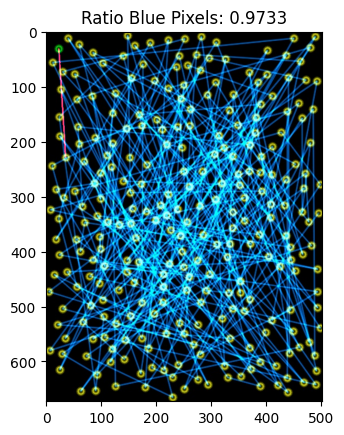

0.9732888146911519

In [11]:
get_ratio_blue_pixels(image, start_point, end_point)

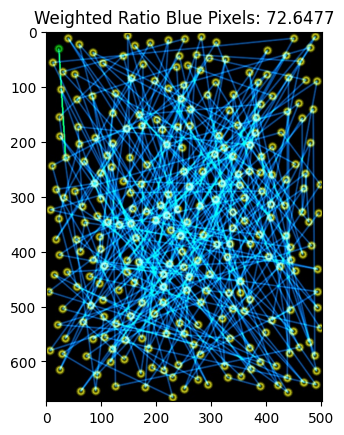

72.64774624373956

In [12]:
get_weighted_ratio_blue_pixels(image, start_point, end_point)

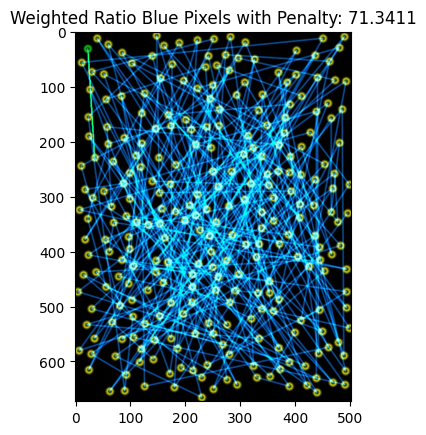

71.34108862652691

In [13]:
get_weighted_ratio_blue_pixels_with_black_pixel_penalty(image, start_point, end_point)

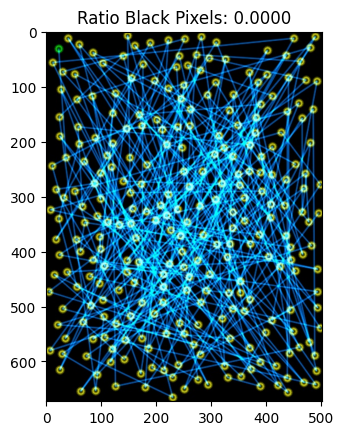

0.0

In [20]:
get_ratio_black_pixels(image, start_point, end_point)

In [21]:
# Apply functions to the image between (23, 31) and (35, 229)
start_point = (23, 31)
end_point = (27, 106)

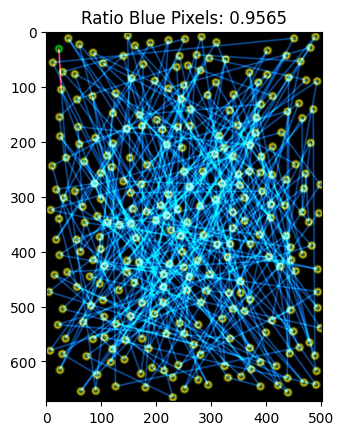

0.9565217391304348

In [15]:
get_ratio_blue_pixels(image, start_point, end_point)

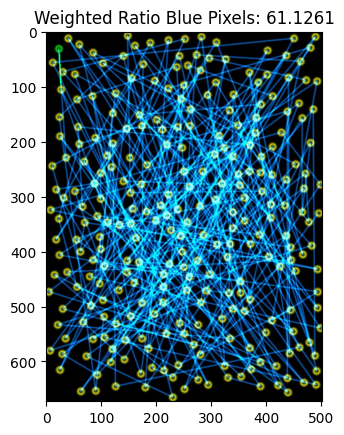

61.12608695652174

In [16]:
get_weighted_ratio_blue_pixels(image, start_point, end_point)

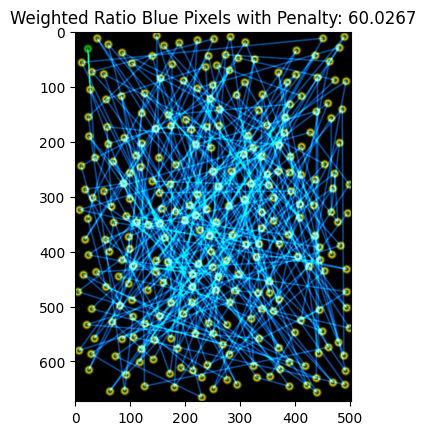

60.02666032236068

In [17]:
get_weighted_ratio_blue_pixels_with_black_pixel_penalty(image, start_point, end_point)

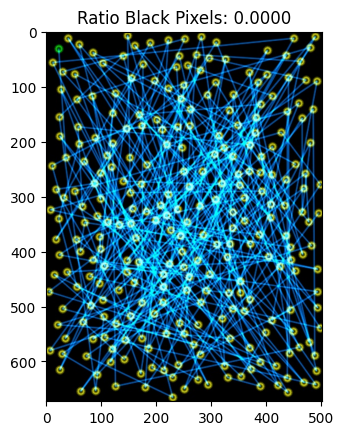

0.0

In [22]:
get_ratio_black_pixels(image, start_point, end_point)